<a href="https://colab.research.google.com/github/saradakantheti-star/ML-projects/blob/main/SMOTE_on_unbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [23]:
#Importing data
!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
dt =pd.read_csv('Spam_finalData.csv')


Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: /content/Spam_finalData.csv
100% 1.64M/1.64M [00:00<00:00, 92.6MB/s]


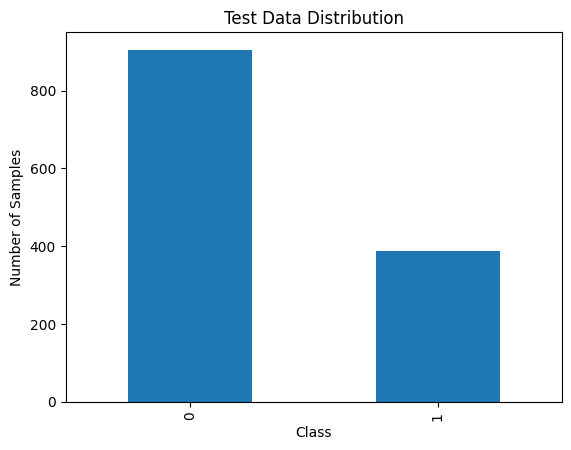

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])

y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()

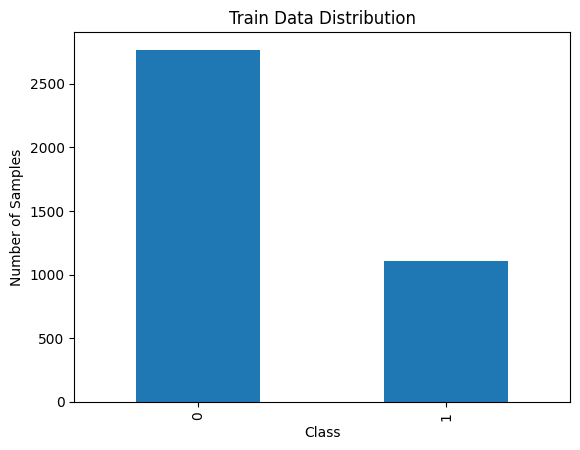

In [25]:
y_train.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Train Data Distribution')
plt.show()

In [26]:
def training(model,X_train,y_train,X_test,y_test):
  model.fit(X_train,y_train)

  train_y_pred=model.predict(X_train)
  test_y_pred=model.predict(X_test)

  train_score = f1_score(y_train,train_y_pred)
  test_score = f1_score(y_test,test_y_pred)

  return train_score,test_score

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
model=LogisticRegression(class_weight={0:1,1:2.37})

f1_train,f1_test=training(model,X_train,y_train,X_test,y_test)
print(f'Training F1 score: {f1_train},Testing F1 score: {f1_test}')

Training F1 score: 0.8445297504798465,Testing F1 score: 0.8520971302428256


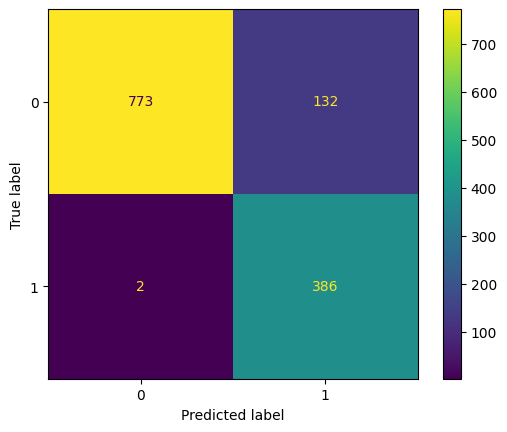

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [29]:
model1=LogisticRegression()

f2_train,f2_test=training(model1,X_train,y_train,X_test,y_test)
print(f'Training F2 score: {f2_train},Testing F2 score: {f2_test}')

Training F2 score: 0.8812553011026294,Testing F2 score: 0.9077490774907749


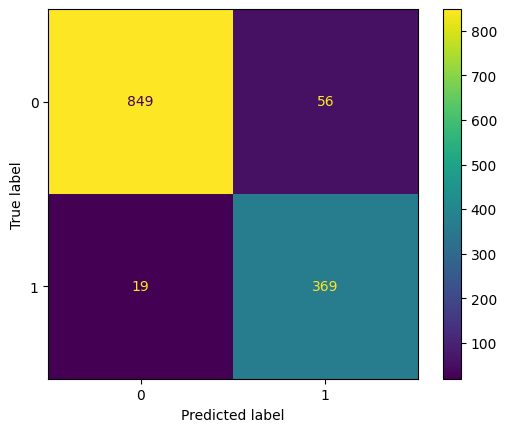

In [30]:
y_pred = model1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

##Coding for OverSampling

In [31]:
from imblearn.over_sampling import RandomOverSampler

In [32]:
# create an instance of Random oversampler
oversampler = RandomOverSampler()

In [35]:
# Perform oversampling on the training data
print('Before Oversampling')
# Convert y_train to a pandas Series before using value_counts()
print(y_train.value_counts())
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
print('After Oversampling')
print(y_resampled.value_counts())

Before Oversampling
label_num
0    2767
1    1111
Name: count, dtype: int64
After Oversampling
label_num
0    2767
1    2767
Name: count, dtype: int64


In [48]:
model3=LogisticRegression()

f3_train,f3_test=training(model3,X_train_oversampled,y_train_oversampled,X_test,y_test)
print(f'Training F1 score: {f3_train},Testing F1 score: {f3_test}')

Training F1 score: 0.926458157227388,Testing F1 score: 0.8502202643171806


## SMOTE - Access synthetically minority over sampled Technique  . Create a new dataset synthetically

In [41]:
from imblearn.over_sampling import SMOTE
#Create an instance of SMOTE
smt =SMOTE()

In [42]:
# Perform SMOTE on the training data
print('Before SMOTE Oversampling')
# Convert y_train to a pandas Series before using value_counts()
print(y_train.value_counts())

Before SMOTE Oversampling
label_num
0    2767
1    1111
Name: count, dtype: int64


In [43]:
x_sm,y_sm = smt.fit_resample(X_train,y_train)
print('After SMOTE Oversampling')
print(y_sm.value_counts())

After SMOTE Oversampling
label_num
0    2767
1    2767
Name: count, dtype: int64


In [47]:
model = LogisticRegression()

f4_train,f4_test=training(model,x_sm,y_sm,X_test,y_test)
print(f'Training F1 score: {f4_train},Testing F1 score: {f4_test}')


Training F1 score: 0.9297205757832345,Testing F1 score: 0.8520971302428256


In [46]:
model = LogisticRegression(C=5, penalty='l1', solver='liblinear')

f4_train,f4_test=training(model,x_sm,y_sm,X_test,y_test)
print(f'Training F1 score: {f4_train},Testing F1 score: {f4_test}')

Training F1 score: 0.9535374868004224,Testing F1 score: 0.9175627240143369
